스타일 목록
['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'petroff10', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']
  manufacturer model  displ  year  cyl       trans drv  cty  hwy fl    class
0         audi    a4    1.8  1999    4    auto(l5)   f   18   29  p  compact
1         audi    a4    1.8  1999    4  manual(m5)   f   21   29  p  compact
2         audi    a4    2.0  2008    4  manual(m6)   f   20   31  p  compact
3         audi    a4    2.0  2008    4    auto(av)   f   21   30  p  compact
4         audi    a4    2.8  1999 

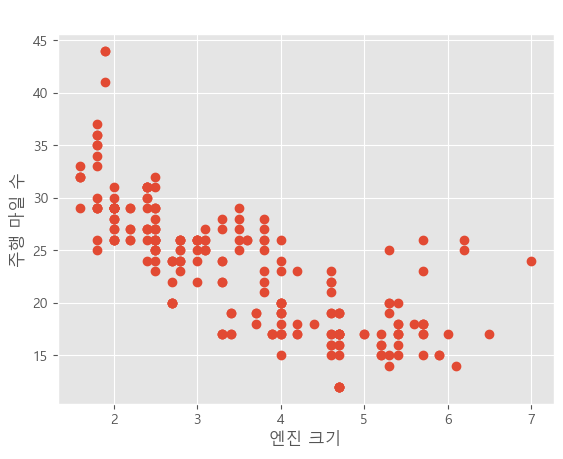

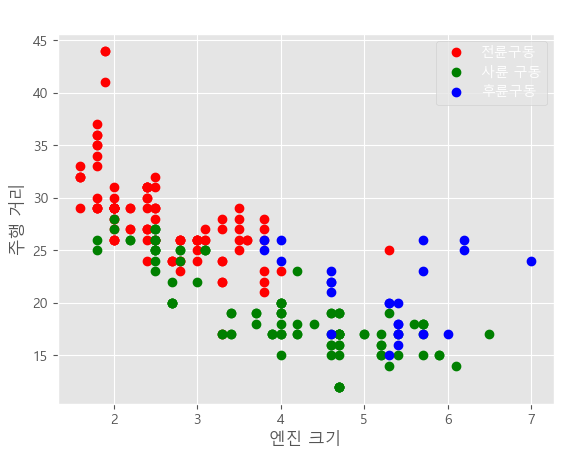

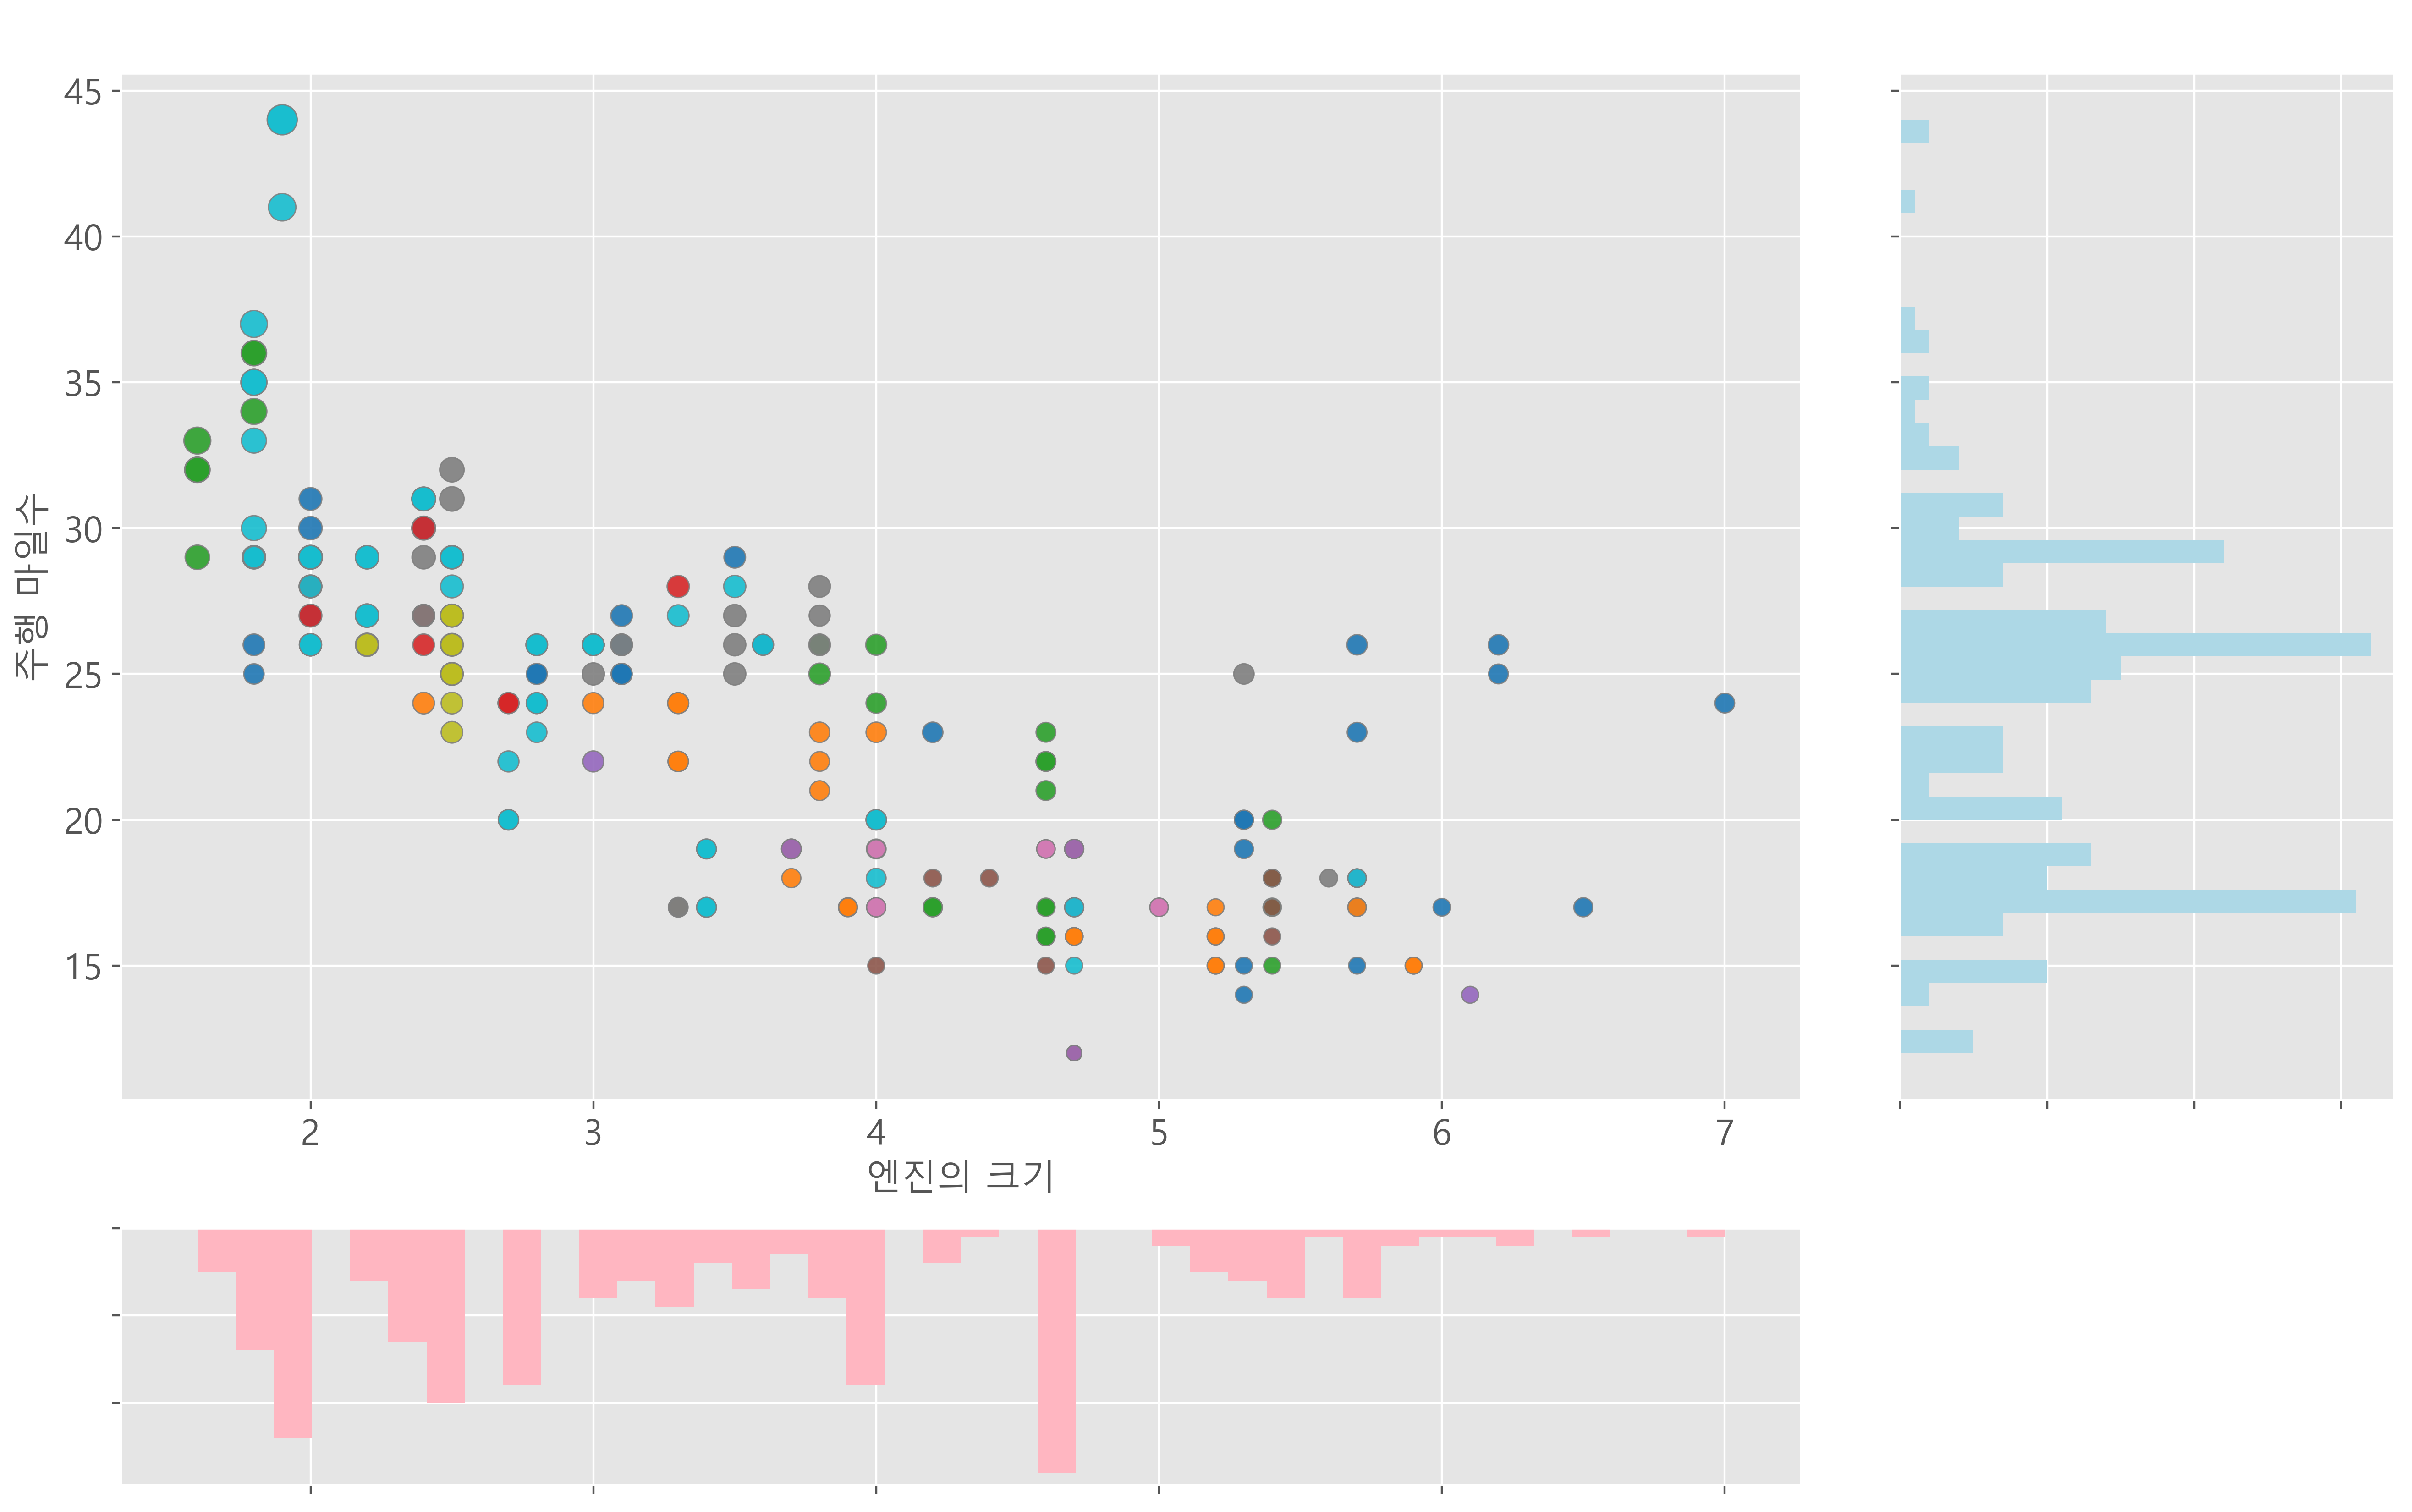

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

plt.rc('font', family = 'Malgun Gothic')
cnt, PNG, UNDERBAR=0, '.png', '_'
CHART_NAME = 'scatterPlotPractice'
filename='./../data/mpg.csv'
plt.style.use('ggplot') #ggplot 형식 스타일 사용

print('스타일 목록')
print(plt.style.available)

mpg = pd.read_csv(filename, encoding='utf-8')
print(mpg.head())

# x축 엔진크기, y축 주행거리 산점도 그래프 그리기
xdata = mpg.loc[:, ['displ']]
ydata = mpg.loc[:, ['hwy']]

plt.figure()
plt.plot(xdata, ydata, marker='o', linestyle='none')
plt.xlabel('엔진 크기')
plt.ylabel('주행 마일 수')
plt.title('산점도 그래프')
plt.grid(True)

cnt += 1
savefile = CHART_NAME + UNDERBAR + str(cnt).zfill(2) + PNG
plt.savefig(savefile, dpi = 400)
print(savefile + '파일이 저장되었습니다.')

# 구동방식에 따른 색상 구분
mycolors = ['r', 'g', 'b'] # 항목 구분을 위한 색상 리스트
label_dict = {'f': '전륜구동', '4': '사륜 구동', 'r': '후륜구동'} # 구동방식을 한글이름으로 변경

plt.figure()

idx=0
labels = mpg['drv'].unique()

for finditem in labels:
    xdata = mpg.loc[mpg['drv'] == finditem, 'displ']
    ydata = mpg.loc[mpg['drv'] == finditem, 'hwy']
    plt.plot(xdata, ydata, color=mycolors[idx], marker='o', linestyle='none', label=label_dict[finditem])
    idx += 1
plt.legend()
plt.xlabel('엔진 크기')
plt.ylabel('주행 거리')
plt.title('산점도 그래프')

cnt += 1
savefile = CHART_NAME + UNDERBAR + str(cnt).zfill(2) + PNG
plt.savefig(savefile, dpi = 400)
print(savefile + '파일을 저장하였습니다.')

# 산점도와 히스토그램 동시에 그리기
#Fig 객체와 gridspec 객체 정의 -> figure객체 내에 서브 플로팅을 위한 gird 배치 관리자 역할
fig = plt.figure(figsize=(16,10), dpi=400)
grid = plt.GridSpec(4, 4, hspace=0.5, wspace=0.2)

# 축 정의
ax_main = fig.add_subplot(grid[:-1, :-1])
ax_right = fig.add_subplot(grid[:-1, -1], xticklabels=[], yticklabels=[])
ax_bottom = fig.add_subplot(grid[-1, 0:-1], xticklabels=[], yticklabels=[])

# 메인 그래프에 산점도를 그리기
ax_main.scatter('displ', 'hwy', s=mpg.cty*4, c=mpg.manufacturer.astype('category').cat.codes, alpha=.9, data=mpg, cmap="tab10", edgecolors='gray', linewidths=.5)

# 하단의 히스토그램
ax_bottom.hist(mpg.displ, 40, histtype='stepfilled', orientation='vertical', color='lightpink')
ax_bottom.invert_yaxis()

#오른쪽 히스토그램
ax_right.hist(mpg.hwy, 40, histtype='stepfilled', orientation='horizontal', color='lightblue')

#Decorations
ax_main.set(title='산점도(엔진크기 vs 주행마일수)', xlabel='엔진의 크기', ylabel='주행 마일수')
ax_main.title.set_fontsize(20)
for item in ([ax_main.xaxis.label, ax_main.yaxis.label] + ax_main.get_xticklabels() + ax_main.get_yticklabels()):
    item.set_fontsize(14)

xlabels = ax_main.get_xticks().tolist()
cnt += 1
savefile = CHART_NAME + UNDERBAR + str(cnt).zfill(2) + PNG
plt.savefig(savefile, dpi = 400, bbox_inches='tight')
print(savefile + "파일이 저장되었습니다.")

